# Seconda Prova Esonero - Metodi AI e Machine Learning per la fisica
### 03.06.2021 - AA 2020/21 - Docente: S. Giagu


> **Regole:**

*   **tempo a disposizione:** 2h30'

*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito* usando questo notebook
*   una volta completato il compito sottomettere il notebook nel apposito folder sul sito e-learning del corso disponibile al link: [consegna esonero](https://elearning.uniroma1.it/mod/assign/view.php?id=405088)(NOTA BENE: una volta sottomesso il notebook non sono più possibili ulteriori modifiche)

*   **NOTA:** gli studenti che usufruiscono di strumenti compensativi devono risolvere i quesiti da 1 a 4 incluso, gli altri studenti devono risolvere tutti i quesiti assegnati

In [ ]:
#@ Dati Personali
import os

Nome = 'Giovanbattista'  #@param {type: "string"}
Cognome = 'Favorito' #@param {type: "string"}
NumeroMatricola = 1939167 #@param {type: "number"}

if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!')
else:
  print('Downloading datasets')
  !rm -rf MS_vertex_esonero.npz
  !wget http://giagu.web.cern.ch/giagu/CERN/MS_vertex_esonero.npz
  print('Done')

--2023-06-12 19:57:48--  http://giagu.web.cern.ch/giagu/CERN/MS_vertex_esonero.npz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.184.21.205, 2001:1458:d00:34::100:59
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.184.21.205|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106576990 (102M)
Saving to: ‘MS_vertex_esonero.npz’

MS_vertex_esonero.n 100%[===================>] 101.64M  1.33MB/s    in 50s     

2023-06-12 19:58:39 (2.03 MB/s) - ‘MS_vertex_esonero.npz’ saved [106576990/106576990]

Done


# Descrizione del compito:

### Dataset:

il dataset fornito è costituito da un file in formato numpy binario *.npz*: *MS_vertex_esonero.npz*, che contiene due tensory numpy (data e target) con shape:
*   data (1000,20,333)
*   target (1000,)

il tensore data contiene per 1000 esempi un'immagine binaria (valore dei pixel {0,1}) che rappresenta il segnale misurato in un rivelatore di particelle cariche in un esperimento di alta energia. I segnali sono prodotti dalle particelle (10 per ogni evento) che provengono dal decadimento di una particella madre che decade a distanze diverse dal rivelatore. Il target rappresenta la distanza di decadimento $d_0$ (in metri) della particella madre dal vertice di interazione posto nell'origine del sistema di coordinate dell'esperimento (il rivelatore si trova a 5m di distanza dall'origine, la distanza $d_0$ può assumere valori continui tra 0m (decadimento nel vertice di interazione alla massima distanza dal rivelatore) e 4.9m (decadimento molto vicino al vertice di interazione).

E' possibile leggere i tensori usando il seguente esempio di codice:

```
inp_file = np.load('MS_vertex_esonero.npz')
data = inp_file['data']
target = inp_file['target']

print(data.shape)
print(target.shape)
```


**È richiesto:**

1.   di graficare qualche evento del campione (3-4 eventi al massimo), e di graficare la distribuzione della distanza $d_0$ per capire come sono distribuiti gli eventi
2.   di associare una opportuna label agli eventi del campione che li divida in eventi "prompt" e eventi "displaced", basandosi sul valore del target:
> prompt: $d_0 <= 1.0$ m <p>
> displaced: $d_0 >= 1.5$ m <p>
3.   di allenare un modello di regressione basato su una architettura ANN che predica il valore della distanza di decadimento $\hat{d}_0$ a partire da una delle immagini del campione
4.   valutarne le prestazioni in termini sia di opportune metriche standard per task di regressione, che di risoluzione sulla stima del target (assumendo la risoluzione gaussiana) in funzione del target stesso, producendo un plot di risoluzione(target_predetto) in funzione del valore del target vero ($\sigma_{\hat{d}_0} ~\text{VS}~ d_0$)
5.  allenare un modello di classificazione basato su una architettura ANN che assegni un particolare evento ad una tra le due possibili categorie prompt o displaced, valutandone opportunamente le prestazioni

Commentare in modo sintetico le scelte e operazioni eseguite nello svolgimento dei vari punti del compito.

In [ ]:
#INIZIO ORE 20:48

# PUNTO 1

In [ ]:
import numpy as np
inp_file = np.load('MS_vertex_esonero.npz')
data = inp_file['data']
target = inp_file['target']

print(data.shape)
print(target.shape)

(1000, 20, 333)
(1000,)


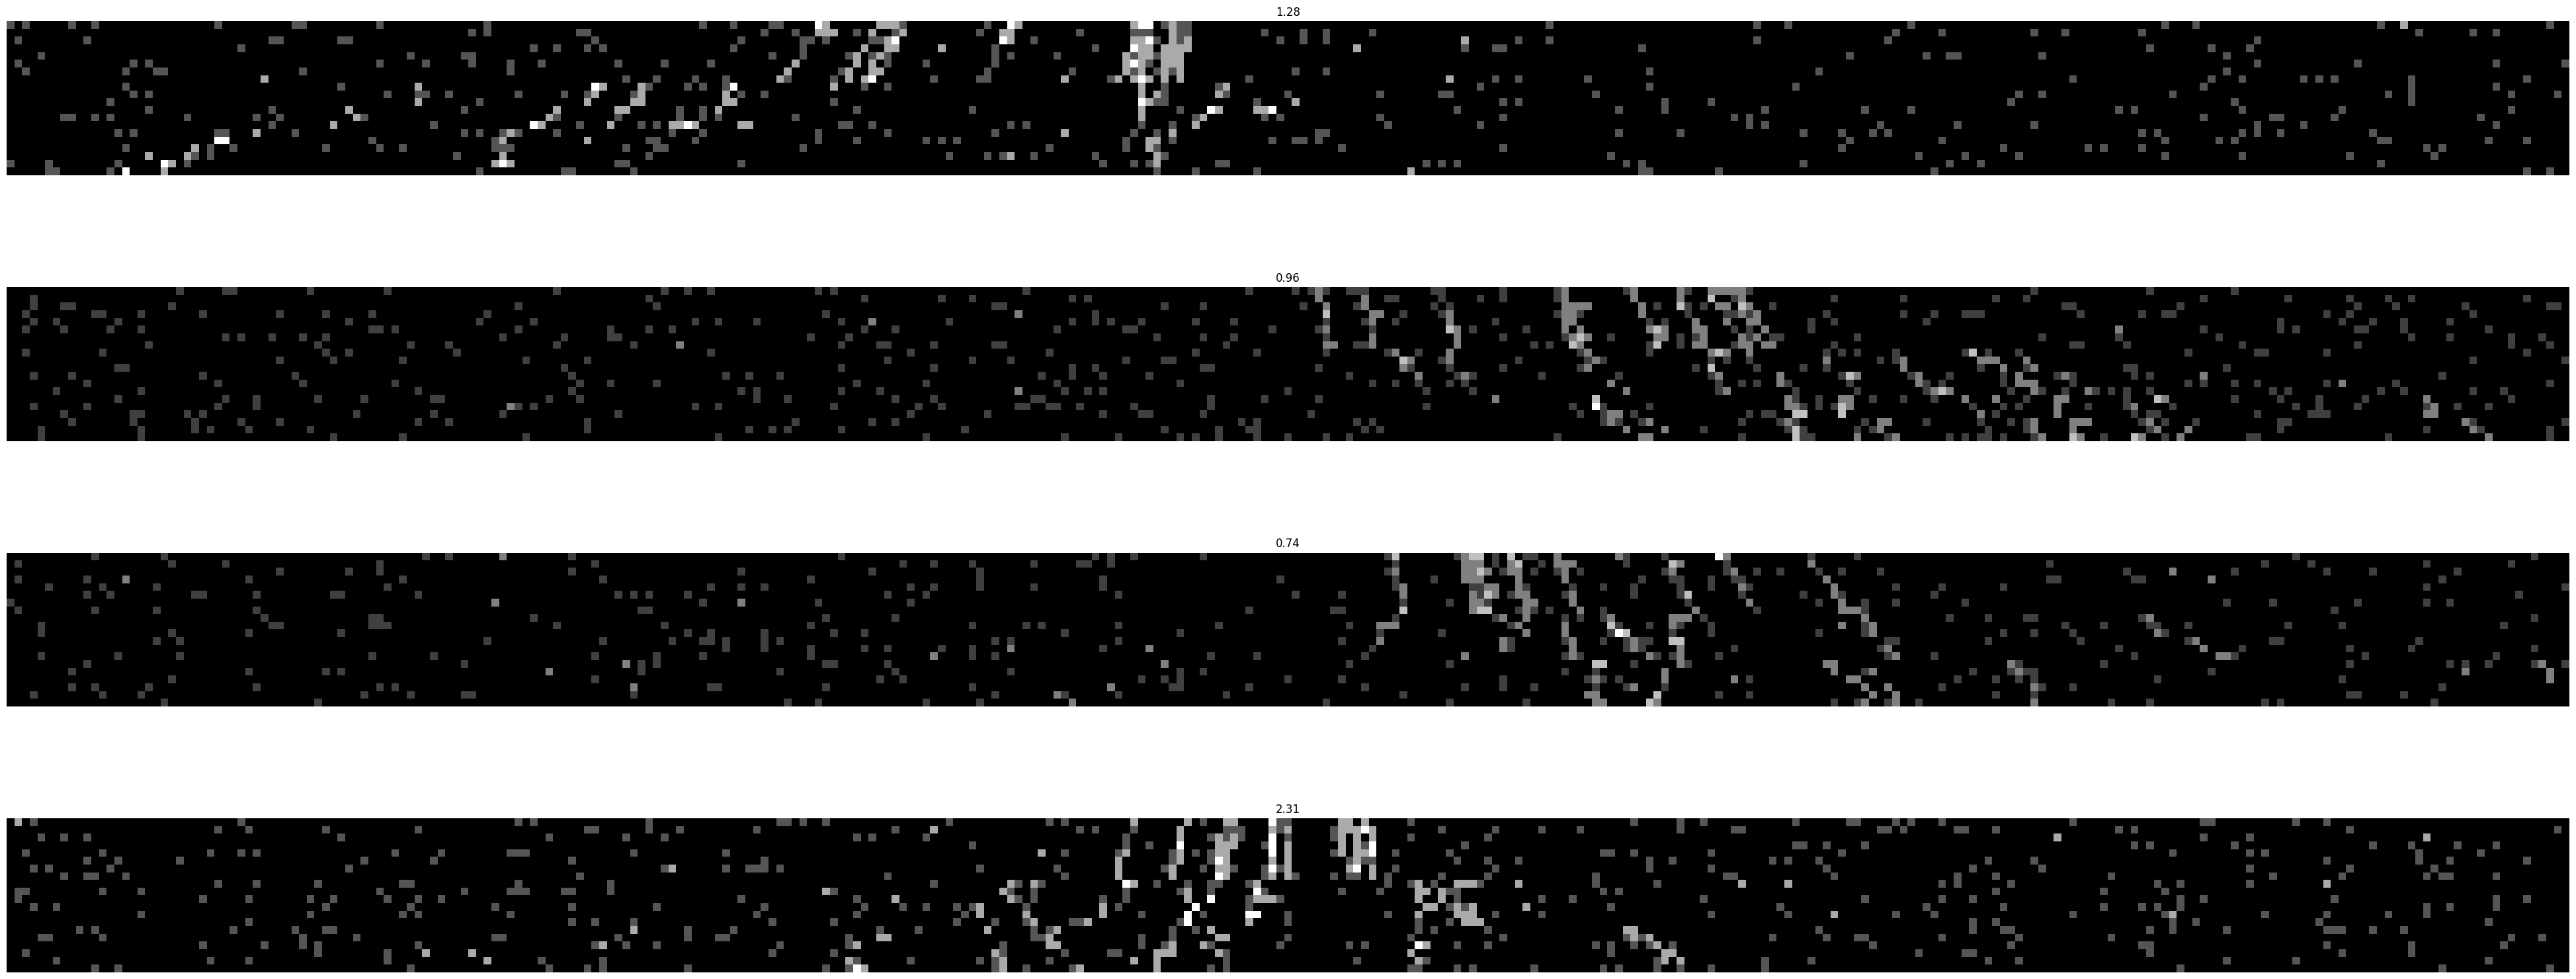

In [ ]:
#Grafico qualche evento campione
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(50, 20))
cols, rows = 1,4
for i in range(1, cols * rows + 1):
    sample_idx = np.random.randint(len(data))
    img, label = data[sample_idx], target[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(np.round(label, 2))
    plt.axis("off")
    plt.imshow(img.reshape((20,333)), cmap="gray")
plt.show()

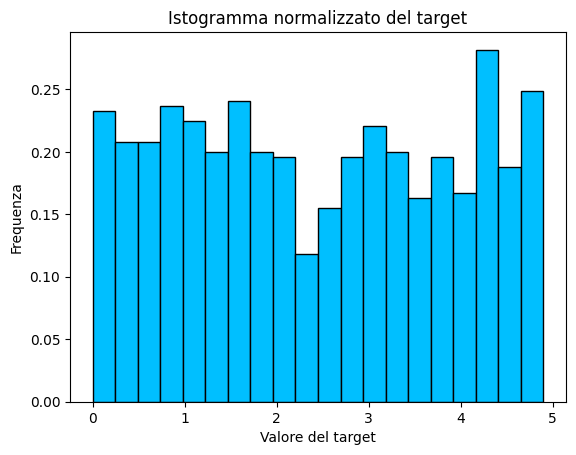

In [ ]:
#Grafico la distanza d0 (istogramma)
plt.title("Istogramma normalizzato del target")
plt.xlabel("Valore del target")
plt.ylabel("Frequenza")
_, _, _ = plt.hist(target, bins = 20, density = True, color = 'deepskyblue', edgecolor = 'black')

# PUNTO 2

In [ ]:
#Divido il target in due classi
labels = np.zeros(len(target))

#Classe prompt -> label = 1
labels[target <= 1.0] = 1

#Classe displaced -> label = 0
labels[target >= 1.5] = 0

# PUNTO 3

In [ ]:
#PREPROCESSING DEI DATI

In [ ]:
#Normalizzazione del target con media 0 e std dev 1
target_norm = (target - np.mean(target))/np.std(target)

print(f"Media target norm: {np.mean(target_norm)}")
print(f"Standard deviation target norm: {np.std(target_norm)}")

Media target norm: 1.6964207816272392e-16
Standard deviation target norm: 0.9999999999999999


In [ ]:
#Divido il campione di features in train, validation e test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, target_norm, test_size=0.40, shuffle = True)
X_vali, X_test, Y_vali, Y_test = train_test_split(X_test, Y_test, test_size=0.50, shuffle = True)

print(f"X train shape: {X_train.shape}")
print(f"Y train shape: {Y_train.shape}")
print(f"X vali shape: {X_vali.shape}")
print(f"Y vali shape: {Y_vali.shape}")
print(f"X test shape: {X_test.shape}")
print(f"Y test shape: {Y_test.shape}")

X train shape: (600, 20, 333)
Y train shape: (600,)
X vali shape: (200, 20, 333)
Y vali shape: (200,)
X test shape: (200, 20, 333)
Y test shape: (200,)


In [ ]:
#Normalizzo il vettore delle features usando solo il train dataset
X_mean = np.mean(X_train)
X_std = np.std(X_train)

X_train_norm = (X_train - X_mean)/X_std
X_vali_norm = (X_vali - X_mean)/X_std
X_test_norm = (X_test - X_mean)/X_std

print(f"X train norm: media = {np.mean(X_train_norm)} \t dev std = {np.std(X_train_norm)}")
print(f"X vali norm: media = {np.mean(X_vali_norm)} \t dev std = {np.std(X_vali_norm)}")
print(f"X test norm: media = {np.mean(X_test_norm)} \t dev std = {np.std(X_test_norm)}")

X train norm: media = -1.8236552297186154e-17 	 dev std = 0.9999999999999994
X vali norm: media = 0.0028811274518682414 	 dev std = 1.0047699285489327
X test norm: media = 0.004462744480089039 	 dev std = 1.0031786861992302


In [ ]:
#Reshape dei tensori per la rete neurale convoluzionale
X_train_norm = X_train_norm.reshape(len(X_train_norm), 20, 333, 1)
X_vali_norm = X_vali_norm.reshape(len(X_vali_norm), 20, 333, 1)
X_test_norm = X_test_norm.reshape(len(X_test_norm), 20, 333, 1)

In [ ]:
#Pytorch
import torch
#Converto in tensori torch
X_train_pt = torch.Tensor(X_train_norm).float()
Y_train_pt = torch.Tensor(Y_train).float()
X_vali_pt = torch.Tensor(X_vali_norm).float()
Y_vali_pt = torch.Tensor(Y_vali).float()
X_test_pt = torch.Tensor(X_test_norm).float()
Y_test_pt = torch.Tensor(Y_test).float()

print(X_train_pt.shape)
print(Y_train_pt.shape)
print(X_vali_pt.shape)
print(Y_vali_pt.shape)
print(X_test_pt.shape)
print(Y_test_pt.shape)

#Reshape dei tensori per mettere il canale per primo
X_train_pt = X_train_pt.permute((0,3,1,2))
X_vali_pt = X_vali_pt.permute((0,3,1,2))
X_test_pt = X_test_pt.permute((0,3,1,2))

#Dataset
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train_pt, Y_train_pt) #creo dataset
vali_dataset = TensorDataset(X_vali_pt, Y_vali_pt)
test_dataset = TensorDataset(X_test_pt, Y_test_pt)

#Dataloader
batch_size = 64
dataloaders = dict() #usiamo un dizionario epr comodità
dataloaders['train'] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloaders['vali'] = DataLoader(vali_dataset, batch_size=batch_size, shuffle=True)
dataloaders['test'] = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


torch.Size([600, 20, 333, 1])
torch.Size([600])
torch.Size([200, 20, 333, 1])
torch.Size([200])
torch.Size([200, 20, 333, 1])
torch.Size([200])


In [ ]:

# controlliamo se la GPU è disponibile e nel caso quale tipo di GPU
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")


Computation device: cpu



In [ ]:
from torch import nn
import torch.nn.functional as F

class myCNN(nn.Module):
  def __init__(self):
    super(myCNN, self).__init__()

    # definizione dei layers

    # primo blocco convoluzionale
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = (3,1))
    self.pool1 = nn.MaxPool2d(kernel_size = (3,2))

    # secondo blocco convoluzionale
    self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = (3,1))
    self.pool2 = nn.MaxPool2d(kernel_size = (3,2))

    # flatten
    self.flatten = nn.Flatten() #Flatten layer

    # MLP
    self.drop1 = nn.Dropout(p=0.5)
    self.fc1 = nn.Linear(in_features = 1328, out_features = 16)
    self.drop2 = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(in_features = 16, out_features = 32)
    self.fc3 = nn.Linear(in_features = 32, out_features = 1)

  # forward pass: x (input) -> out
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool1(x)
    x = F.relu(self.conv2(x))
    x = self.pool2(x)
    #flatten
    x = self.flatten(x)

    #mlp
    x = self.drop1(x)
    x = self.fc1(x)
    x = F.relu(x)

    x = self.drop2(x)
    x = self.fc2(x)
    x = F.relu(x)

    out = self.fc3(x)

    return out

In [ ]:
# printout del modello
model = myCNN()
print(model)

from torchsummary import summary
if torch.cuda.is_available():
  summary(model.cuda(), input_size=(1,20,333))
else:
  summary(model, input_size=(1,20,333))

myCNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 1), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(3, 2), stride=(3, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 1), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=(3, 2), stride=(3, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (drop1): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1328, out_features=16, bias=True)
  (drop2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 8, 18, 333]              32
         MaxPool2d-2            [-1, 8, 6, 166]               0
            Conv2d-3           [-1, 16, 4, 166]             400
         MaxPool2d-4            [-1, 16, 1, 83]   

In [ ]:
#Test
xb, yb = next(iter(dataloaders['train']))

xb = xb.to(device)
yb = yb.to(device)

model.to(device)

out = model(xb)

print('Input rete neurale: ', xb.shape)
print('Output rete neurale: ', out.shape)
print(out[0])

Input rete neurale:  torch.Size([64, 1, 20, 333])
Output rete neurale:  torch.Size([64, 1])
tensor([-0.1233], grad_fn=<SelectBackward0>)


In [ ]:
#install torchmetrics: collection of useful PyTorch metrics implementations and an easy-to-use API to create custom metrics
%pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 17.1 MB/s eta 0:00:00


In [ ]:
#loss (usiamo MSE)
loss_func=torch.nn.MSELoss()

#metrica (usiamo MAE)
metric_func=torch.nn.L1Loss()

#ottimizzatore
lr = 1e-3
opt=torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
class SaveBestModel:
    def __init__(self, best_valid_loss=float('inf')):
        self.best_valid_loss = best_valid_loss

    def __call__(self, current_valid_loss, epoch, model):
        if current_valid_loss < self.best_valid_loss:
            self.best_valid_loss = current_valid_loss
            print("\nFound new best validation loss: %f in epoch %i" %(self.best_valid_loss, epoch+1))
            print("Saving model...")
            torch.save(model, 'best_model.pt')

save_model=SaveBestModel()

In [ ]:
#Training
import time

save_model=SaveBestModel()
model=myCNN()
opt=torch.optim.Adam(model.parameters(), lr=lr)
model=model.to(device)

epochs=100

hist_loss = []
hist_metric=[]
hist_vloss = []
hist_vmetric=[]

start_t=time.time()

for epoch in range(epochs):
  t0=time.time()

  # training
  model.train()
  train_loss=0
  train_metric=0
  counter=0
  for xb, yb in dataloaders['train']:
    counter += 1
    xb=xb.to(device)
    yb=yb.to(device)

    pred=model(xb)
    loss=loss_func(pred.view(-1), yb)
    metric=metric_func(pred.view(-1), yb)

    train_metric+=metric.item()
    train_loss+=loss.item()

    #update weights
    opt.zero_grad()
    loss.backward()
    opt.step()

  train_loss /=counter
  train_metric/=counter
  hist_loss.append(train_loss)
  hist_metric.append(train_metric)

  model.eval()
  vali_loss=0
  vali_metric=0
  counter=0

  with torch.no_grad():
    for xb, yb in dataloaders['vali']:
      counter += 1
      xb=xb.to(device)
      yb=yb.to(device)

      pred=model(xb)

      vloss=loss_func(pred.view(-1), yb)
      vmetric=metric_func(pred.view(-1), yb)

      vali_loss += vloss.item()
      vali_metric += vmetric.item()


  vali_loss /= counter
  vali_metric /= counter
  hist_vloss.append(vali_loss)
  hist_vmetric.append(vali_metric)

  elapsed_time = time.time()-t0
  print("epoch: %d, time [s]: %.4f, train loss: %.6f, train mae: %.6f, vali loss: %.6f, vali mae: %.6f"  %(epoch+1, elapsed_time, train_loss, train_metric ,vali_loss, vali_metric))
  save_model(vali_loss, epoch, model)

epoch: 1, time [s]: 1.2918, train loss: 0.990118, train mae: 0.874827, vali loss: 0.978439, vali mae: 0.877271

Found new best validation loss: 0.978439 in epoch 1
Saving model...
epoch: 2, time [s]: 0.7347, train loss: 0.993008, train mae: 0.874851, vali loss: 0.934240, vali mae: 0.864191

Found new best validation loss: 0.934240 in epoch 2
Saving model...
epoch: 3, time [s]: 0.9350, train loss: 0.908264, train mae: 0.840130, vali loss: 0.883270, vali mae: 0.834812

Found new best validation loss: 0.883270 in epoch 3
Saving model...
epoch: 4, time [s]: 0.5460, train loss: 0.801980, train mae: 0.786475, vali loss: 0.835058, vali mae: 0.823830

Found new best validation loss: 0.835058 in epoch 4
Saving model...
epoch: 5, time [s]: 0.7191, train loss: 0.791058, train mae: 0.749788, vali loss: 0.739326, vali mae: 0.762350

Found new best validation loss: 0.739326 in epoch 5
Saving model...
epoch: 6, time [s]: 0.8776, train loss: 0.718055, train mae: 0.711291, vali loss: 0.745169, vali mae

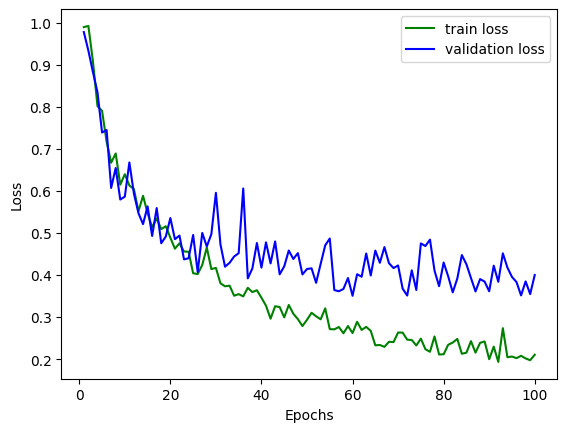

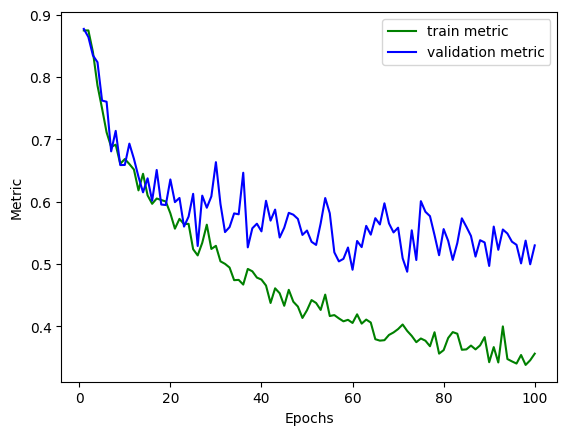

In [ ]:
# grafico monitoring training
# loss vs epoca per train e validation
plt.figure()
plt.plot(range(1, len(hist_loss) + 1), hist_loss, color = 'green', linestyle = '-', label = 'train loss')
plt.plot(range(1, len(hist_vloss) + 1), hist_vloss, color = 'blue', linestyle = '-', label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy vs epoca per train e validation
plt.figure()
plt.plot(range(1, len(hist_metric) + 1), hist_metric, color = 'green', linestyle = '-', label = 'train metric')
plt.plot(range(1, len(hist_vmetric) + 1), hist_vmetric, color = 'blue', linestyle = '-', label = 'validation metric')
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.legend()

plt.show()

# PUNTO 4

In [ ]:
# Valuto prestazioni in termini di metriche standard
# load best model

model=torch.load('./best_model.pt')
model.eval()
model.to("cpu")

counter=0
test_loss=0
test_metric=0
yhat=[]
y=[]

with torch.no_grad():
    for xb, yb in dataloaders['test']:
      counter+=1
      xb=xb.to("cpu")
      yb=yb.to("cpu")
      pred = model(xb)


      tloss=loss_func(pred.view(-1), yb)
      tmetric=metric_func(pred.view(-1), yb)

      test_loss += tloss.item()
      test_metric += tmetric.item()

      yhat.append(pred)
      y.append(yb)

test_loss/=counter
test_metric/=counter

print("Test loss:", test_loss, "Test metric: ", test_metric)

Test loss: 0.41159026324748993 Test metric:  0.5395573973655701


In [ ]:
#Cosa vuol dire l'altra cosa??

# PUNTO 5

Task di classificazione binaria

In [ ]:
allenare un modello di classificazione basato su una architettura ANN che assegni un particolare evento ad una tra le due possibili categorie prompt o displaced, valutandone opportunamente le prestazioni

SyntaxError: ignored

In [ ]:
#Reshape dei vettori per shallowMLP
X_train_norm = X_train_norm.reshape(len(X_train_norm), 20*333)
X_vali_norm = X_vali_norm.reshape(len(X_vali_norm), 20*333)
X_test_norm = X_test_norm.reshape(len(X_test_norm), 20*333)

#Converto in tensori torch
X_train_pt = torch.Tensor(X_train_norm).float()
Y_train_pt = torch.Tensor(labels[:len(X_train_norm)]).int()
X_vali_pt = torch.Tensor(X_vali_norm).float()
Y_vali_pt = torch.Tensor(labels[len(X_train_norm):len(X_train_norm)+len(X_vali_norm)]).int()
X_test_pt = torch.Tensor(X_test_norm).float()
Y_test_pt = torch.Tensor(labels[len(X_train_norm)+len(X_vali_norm):len(X_train_norm)+len(X_vali_norm)+len(X_test_norm)]).int()

print(X_train_pt.shape)
print(Y_train_pt.shape)
print(X_vali_pt.shape)
print(Y_vali_pt.shape)
print(X_test_pt.shape)
print(Y_test_pt.shape)

torch.Size([600, 6660])
torch.Size([600])
torch.Size([200, 6660])
torch.Size([200])
torch.Size([200, 6660])
torch.Size([200])


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

batch = 20

dataset_train = TensorDataset(X_train_pt, Y_train_pt)
train_dl = DataLoader(dataset_train, batch_size = batch, shuffle = True)

dataset_vali = TensorDataset(X_vali_pt, Y_vali_pt)
vali_dl = DataLoader(dataset_vali, batch_size = batch, shuffle = True)

dataset_test = TensorDataset(X_test_pt, Y_test_pt)
test_dl = DataLoader(dataset_test, batch_size = batch, shuffle = True)

In [ ]:
from torch import nn
import torch.nn.functional as F

class ShallowMLP(nn.Module):
  def __init__(self, input_dim=6660, output_dim=1, hidden_dim=7168):
    super(ShallowMLP, self).__init__()

    #torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

    self.layer1 = nn.Linear(input_dim, hidden_dim)
    self.activ1 = nn.ReLU()

    self.layer2 = nn.Linear(hidden_dim, output_dim)
    self.activ2 = nn.Sigmoid()

  def forward(self, x):

    out = self.layer1(x)
    out = self.activ1(out)
    out = self.layer2(out)
    out = self.activ2(out)
    # NOTA: non applichiamo softmax perché la loss nn.CrossEntropyLoss() già applica automaticamente al suo interno il softmax
    # alternativamente potremmo usare come loss la negative loglikelihood nn.NLLLoss() che non applica il softmax, in questo caso dovremmo
    # applicare noi il log(softmax) all'output della rete
    #out = F.log_softmax(x, dim=1)
    return out

In [ ]:
#printout del modello
model = ShallowMLP()
print(model)

from torchsummary import summary
if torch.cuda.is_available():
  summary(model.cuda(), input_size=(1,6660))
else:
  summary(model, input_size=(1,6660))

ShallowMLP(
  (layer1): Linear(in_features=6660, out_features=7168, bias=True)
  (activ1): ReLU()
  (layer2): Linear(in_features=7168, out_features=1, bias=True)
  (activ2): Sigmoid()
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 7168]      47,746,048
              ReLU-2              [-1, 1, 7168]               0
            Linear-3                 [-1, 1, 1]           7,169
           Sigmoid-4                 [-1, 1, 1]               0
Total params: 47,753,217
Trainable params: 47,753,217
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.11
Params size (MB): 182.16
Estimated Total Size (MB): 182.30
----------------------------------------------------------------


In [ ]:
# testiamo un batch deldataset di train sul modello non addestrato per vedere che le cose funzionino
feat, label = next(iter(train_dl))

#feat=feat.to(device)
#label=label.to(device)

#model.to(device)

out = model(feat)

print('input della rete neurale: ', xb.shape)
print('output della rete neurale: ', out.shape)
print(out[0])

input della rete neurale:  torch.Size([20, 6660])
output della rete neurale:  torch.Size([20, 1])
tensor([0.4658], grad_fn=<SelectBackward0>)


In [ ]:
# loss function
loss_func = nn.CrossEntropyLoss()
#oppure loss_func = nn.BCELoss()

# ottimizzatore
from torch import optim
opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


# metrica
from torchmetrics.classification import Accuracy

metric_func = Accuracy(task ='binary')
#metric_func = metric_func.to(device)

In [ ]:
# vogliamo usare la GPU quindi spostiamo il modello sulla GPU
model.to(device)
print(next(model.parameters()).device)

cpu


In [ ]:
# in pytorch è necessario scriversi il loop di training, cioè il loop sulle epoch di training in cui in ogni
# epoca si leggono tutti gli eventi del dataset aggiornando i pesi dopo ogni mini-batch
import time

# numero di epoche
epochs = 100

# liste su cui salvare il valore della loss e della metrica ad ogni epoca per poterli graficare in funzione
# dell'epoca a fine addestramento
hist_loss = []
hist_metric = []
hist_vloss = []
hist_vmetric = []

# loop sulle epoche
for epoch in range(epochs):
    t0 = time.time()

    # training step (in cui aggiorniamo i pesi della rete neurale)
    model.train()
    train_loss = 0
    train_metric = 0
    counter = 0
    for xb, yb in train_dl:
        counter += 1

        #Move data and target to device
        xb = xb.to(device)
        yb = yb.type(torch.LongTensor).to(device)

        #Model prediction
        pred = model(xb)

        #Compute loss
        loss = loss_func(pred.view(-1), yb)

        #Metric
        metric = metric_func(pred.view(-1), yb)

        #aggiorno la loss e metrica totale
        train_loss += loss.item()
        train_metric += metric.item()

        # backpropagation
        loss.backward()
        opt.step()
        opt.zero_grad()


    train_loss /= counter
    train_metric /= (counter)

    hist_loss.append(train_loss)
    hist_metric.append(train_metric)

    # validation step (non vengono aggiornati i pesi)
    model.eval()
    vali_loss = 0
    vali_metric = 0
    counter = 0
    with torch.no_grad(): #evita che si aggiornino i pesi
      for xb, yb in vali_dl:
        counter += 1
        xb=xb.to(device)
        yb=yb.type(torch.LongTensor).to(device)

        pred = model(xb) #predizione del modello

        # calcolo loss e metrica
        vloss = loss_func(pred.view(-1), yb)
        vmetric = metric_func(pred.view(-1), yb)
        vali_loss += vloss.item()
        vali_metric += vmetric.item()

    vali_loss /= counter
    vali_metric /= (counter)
    hist_vloss.append(vali_loss)
    hist_vmetric.append(vali_metric)

    elapsed_time = time.time()-t0
    print("epoch: %d, time(s): %.4f, train loss: %.6f, train metric: %.6f, vali loss: %.6f, vali metric: %.6f"
          % (epoch+1, elapsed_time, train_loss, train_metric, vali_loss, vali_metric))

RuntimeError: ignored